<a href="https://colab.research.google.com/github/cod3astro/kaggle_ML_competition/blob/main/kaggle_introvert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [4]:
df = pd.read_csv('train.csv', index_col='id')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


/tmp/ipython-input-5-3138397443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Social_event_attendance', y='Stage_fear', inner='box', palette='Dark2')


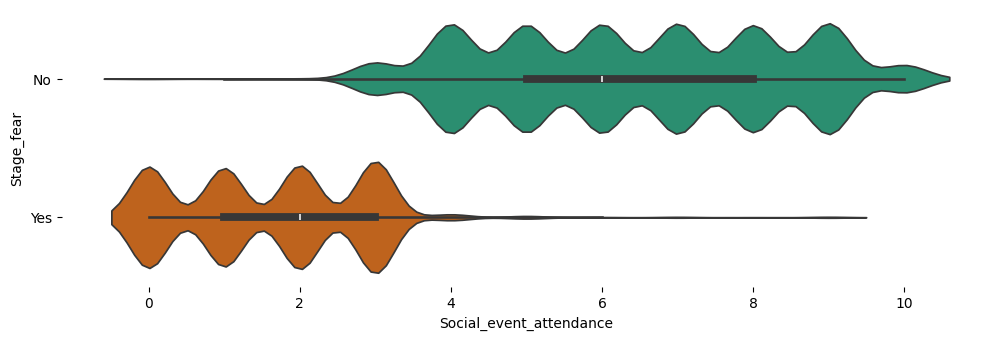

In [5]:
# @title Stage_fear vs Social_event_attendance

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Stage_fear'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Social_event_attendance', y='Stage_fear', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

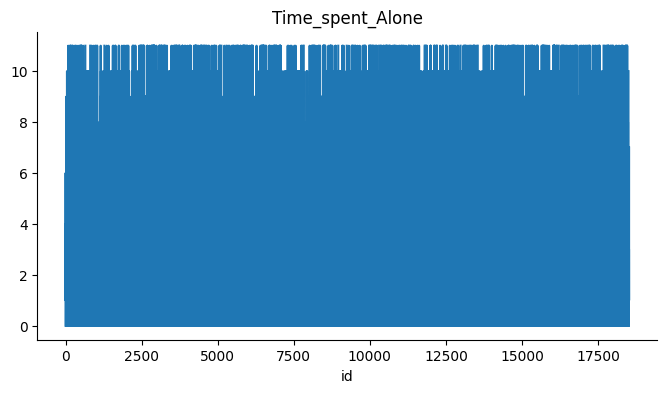

In [6]:
# @title Time_spent_Alone

from matplotlib import pyplot as plt
df['Time_spent_Alone'].plot(kind='line', figsize=(8, 4), title='Time_spent_Alone')
plt.gca().spines[['top', 'right']].set_visible(False)

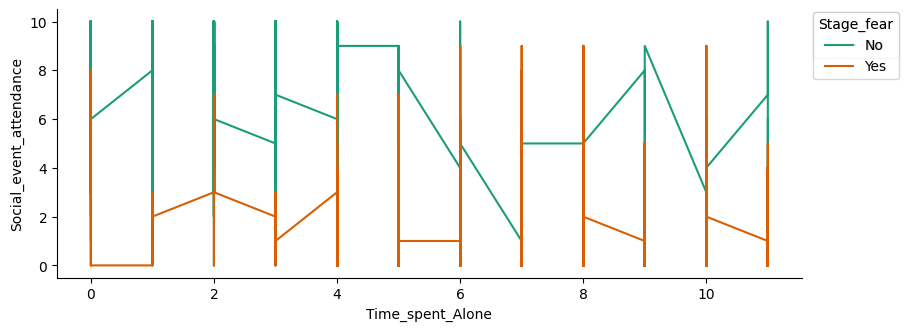

In [7]:
# @title Time_spent_Alone vs Social_event_attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time_spent_Alone']
  ys = series['Social_event_attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 3.2), layout='constrained')
df_sorted = df.sort_values('Time_spent_Alone', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Stage_fear')):
  _plot_series(series, series_name, i)
  fig.legend(title='Stage_fear', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time_spent_Alone')
_ = plt.ylabel('Social_event_attendance')

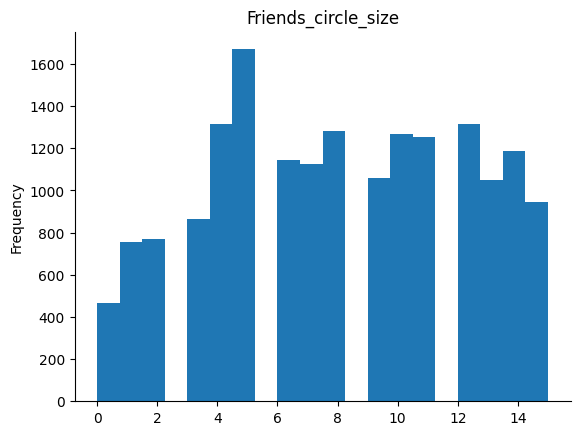

In [8]:
# @title Friends_circle_size

from matplotlib import pyplot as plt
df['Friends_circle_size'].plot(kind='hist', bins=20, title='Friends_circle_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

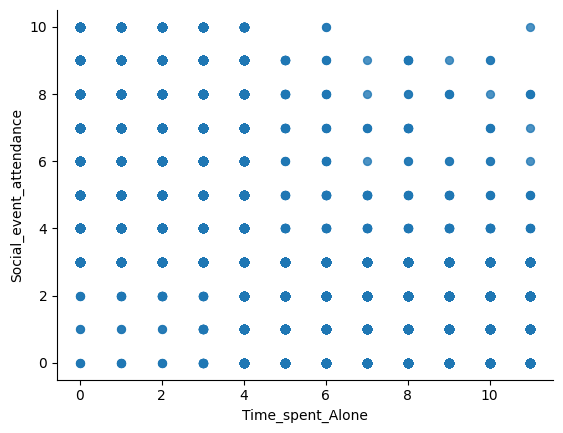

In [9]:
# @title Time_spent_Alone vs Social_event_attendance

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Time_spent_Alone', y='Social_event_attendance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

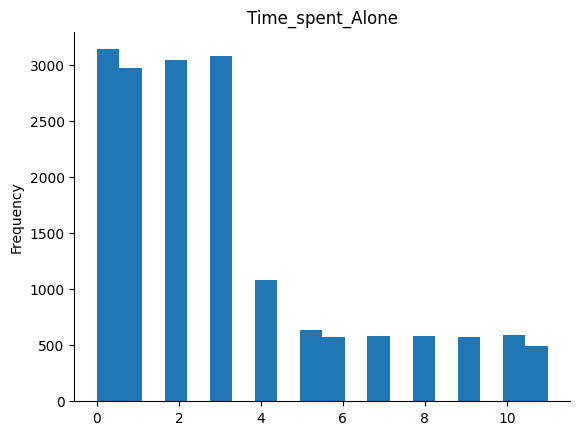

In [10]:
# @title Time_spent_Alone

from matplotlib import pyplot as plt
df['Time_spent_Alone'].plot(kind='hist', bins=20, title='Time_spent_Alone')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
df.shape

(18524, 8)

In [12]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [14]:
df.isnull().sum()

,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [15]:
for col in df.columns:
  unique_values = df[col].unique()
  print(f'{col}: {len(unique_values)} unique values')
  print(f'{unique_values}\n')

Time_spent_Alone: 13 unique values
[ 0.  1.  6.  3.  2.  4. nan  5.  9. 10.  7.  8. 11.]

Stage_fear: 3 unique values
['No' 'Yes' nan]

Social_event_attendance: 12 unique values
[ 6.  7.  1.  4.  8.  2.  5. nan  0.  9.  3. 10.]

Going_outside: 9 unique values
[ 4.  3.  0.  5. nan  1.  6.  2.  7.]

Drained_after_socializing: 3 unique values
['No' nan 'Yes']

Friends_circle_size: 17 unique values
[15. 10.  3. 11. 13. nan  4.  0. 14.  5.  9. 12.  8.  2.  1.  6.  7.]

Post_frequency: 12 unique values
[ 5.  8.  0. nan  3.  4.  2.  9. 10.  6.  7.  1.]

Personality: 2 unique values
['Extrovert' 'Introvert']



In [16]:
df_drop = df.dropna()
df_drop = df_drop.drop_duplicates()
print(df_drop.shape)
df_drop.info()

(10189, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 10189 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           10189 non-null  float64
 1   Stage_fear                 10189 non-null  object 
 2   Social_event_attendance    10189 non-null  float64
 3   Going_outside              10189 non-null  float64
 4   Drained_after_socializing  10189 non-null  object 
 5   Friends_circle_size        10189 non-null  float64
 6   Post_frequency             10189 non-null  float64
 7   Personality                10189 non-null  object 
dtypes: float64(5), object(3)
memory usage: 716.4+ KB


In [17]:
numerical_col = []
categorical_col = []

In [18]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from scipy.stats import pointbiserialr, chi2_contingency

In [19]:
Features = ['Post_frequency', 'Friends_circle_size', 'Going_outside', 'Social_event_attendance', 'Time_spent_Alone',
            'Drained_after_socializing', 'Stage_fear']
Target = 'Personality'
X = df[Features]
y = df[Target]
a = df_drop[Features]
b = df_drop[Target]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)
train_a, val_a, train_b, val_b = train_test_split(a, b, random_state=42)

In [20]:
y.value_counts(normalize=True)

,proportion
Personality,
Extrovert,0.739527
Introvert,0.260473


In [21]:
b.value_counts(normalize=True)

,proportion
Personality,
Extrovert,0.826578
Introvert,0.173422


In [22]:
for col in a.select_dtypes('object'):
  a.loc[:, col], _ = a[col].factorize()
discrete_features = a.dtypes == int
b, _ = pd.factorize(b)

def make_mi_scores(a, b, discrete_features):
  mi_scores = mutual_info_classif(a, b, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name='MI SCORES', index=a.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(a, b, discrete_features)
mi_scores

,MI SCORES
Stage_fear,0.315213
Drained_after_socializing,0.311114
Time_spent_Alone,0.270068
Social_event_attendance,0.255494
Post_frequency,0.236679
Going_outside,0.229636
Friends_circle_size,0.216157


In [24]:
target = 'Personality'

categorical_features = ['Stage_fear', 'Drained_after_socializing']
numerical_features = ['Post_frequency', 'Friends_circle_size', 'Going_outside', 'Social_event_attendance', 'Time_spent_Alone']

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_scores = {}
for col in categorical_features:
    cramers_scores[col] = cramers_v(df[col], df[target])

X_num = df_drop[numerical_features]
y = df_drop[target]
mi_scores = mutual_info_classif(X_num, y, discrete_features=False)
mi_scores_dict = dict(zip(numerical_features, mi_scores))

all_scores = {**cramers_scores, **mi_scores_dict}
all_scores_series = pd.Series(all_scores).sort_values(ascending=False)

print("\n📊 Combined Feature Correlation Report with Target:")
print(all_scores_series)


📊 Combined Feature Correlation Report with Target:
Stage_fear                   0.913238
Drained_after_socializing    0.912435
Time_spent_Alone             0.266424
Social_event_attendance      0.254142
Post_frequency               0.238275
Going_outside                0.229986
Friends_circle_size          0.215736
dtype: float64
